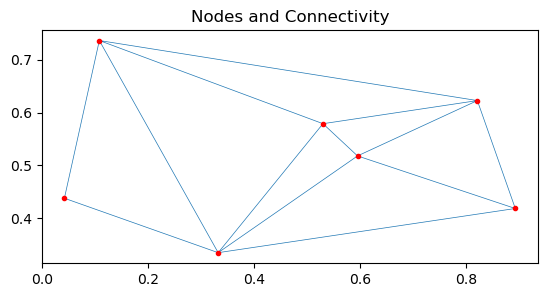

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.tri as tri

# Generate 2D triangular mesh
n_nodes = 7
n_triangles = n_nodes - 2

# Randomly generate node coordinates
np.random.seed(6)
node_x = np.random.rand(n_nodes)
node_y = np.random.rand(n_nodes)

# Triangulate the nodes
triangulation = tri.Triangulation(node_x, node_y)


# Plot the nodes and connectivity using matplotlib
fig, ax = plt.subplots()
ax.set_aspect("equal")
ax.triplot(triangulation, lw=0.5)
ax.plot(node_x, node_y, 'r.')
ax.set_title("Nodes and Connectivity")
plt.show()

In [2]:
dir(triangulation)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_cpp_triangulation',
 '_edges',
 '_extract_triangulation_params',
 '_neighbors',
 '_trifinder',
 'calculate_plane_coefficients',
 'edges',
 'get_cpp_triangulation',
 'get_from_args_and_kwargs',
 'get_masked_triangles',
 'get_trifinder',
 'is_delaunay',
 'mask',
 'neighbors',
 'set_mask',
 'triangles',
 'x',
 'y']

In [3]:
print(triangulation.is_delaunay)
print(triangulation.x)
print(triangulation.y)
print(triangulation.edges)

True
[0.89286015 0.33197981 0.82122912 0.04169663 0.10765668 0.59505206
 0.52981736]
[0.41880743 0.33540785 0.62251943 0.43814143 0.73588211 0.51803641
 0.5788586 ]
[[1 0]
 [2 0]
 [3 1]
 [4 1]
 [4 2]
 [4 3]
 [5 0]
 [5 1]
 [5 2]
 [6 1]
 [6 2]
 [6 4]
 [6 5]]


In [11]:
# Create mesh dataset
mesh_ds = xr.Dataset(
    {
        "node_x": (["node"], node_x),
        "node_y": (["node"], node_y),
        "triangle_nodes": (["triangle", "vertex"], triangulation.triangles),
        "cf_role": "mesh_topology",
    },
    # coords={"node": np.arange(n_nodes), "triangle": np.arange(n_triangles), "vertex": np.arange(3)},
)


In [12]:
mesh_ds

<xarray.Dataset>
Dimensions:         (node: 7, triangle: 7, vertex: 3)
Dimensions without coordinates: node, triangle, vertex
Data variables:
    node_x          (node) float64 0.8929 0.332 0.8212 ... 0.1077 0.5951 0.5298
    node_y          (node) float64 0.4188 0.3354 0.6225 ... 0.7359 0.518 0.5789
    triangle_nodes  (triangle, vertex) int32 1 4 3 1 6 4 4 6 ... 1 5 0 2 5 5 2 6
    cf_role         <U13 'mesh_topology'

In [13]:
standard_name = lambda v: v is not None
mesh_ds.filter_by_attrs(cf_role=standard_name)

<xarray.Dataset>
Dimensions:  ()
Data variables:
    *empty*